In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing pada dataset Emas

In [35]:
df_gold_day = pd.read_csv("../dataset/gold_data_1d.csv")

# Cek ringkasan dataset
print(df_gold_day.info())
print(df_gold_day.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5998 non-null   object 
 1   Open    5997 non-null   object 
 2   High    5997 non-null   object 
 3   Low     5997 non-null   object 
 4   Close   5997 non-null   object 
 5   Volume  5997 non-null   object 
 6   Return  5996 non-null   float64
 7   Ticker  5996 non-null   object 
dtypes: float64(1), object(7)
memory usage: 375.0+ KB
None
            Return
count  5996.000000
mean      0.000429
std       0.010846
min      -0.093538
25%      -0.004766
50%       0.000466
75%       0.006264
max       0.090277


In [36]:
df_hours_gold = pd.read_csv("../dataset/gold_data.csv")

# Cek ringkasan dataset
print(df_hours_gold.info())
print(df_hours_gold.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   10996 non-null  object 
 1   Open    10995 non-null  object 
 2   High    10995 non-null  object 
 3   Low     10995 non-null  object 
 4   Close   10995 non-null  object 
 5   Volume  10995 non-null  object 
 6   Return  10994 non-null  float64
 7   Ticker  10994 non-null  object 
dtypes: float64(1), object(7)
memory usage: 687.4+ KB
None
             Return
count  10994.000000
mean       0.000044
std        0.001851
min       -0.019921
25%       -0.000707
50%        0.000042
75%        0.000826
max        0.021418


In [37]:
# 1. Hapus baris pertama jika mengandung header tambahan
df_gold_day = df_gold_day.iloc[2:].reset_index(drop=True)

# 2. Hapus kolom duplikat atau yang tidak relevan
drop_columns = ['Close.1', 'High.1', 'Low.1', 'Open.1', 'Volume.1', 
                'Close.2', 'High.2', 'Low.2', 'Open.2', 'Volume.2']
df_gold_day.drop(columns=drop_columns, errors='ignore', inplace=True)

# 3. Hapus baris dengan banyak NaN (jika jumlah NaN > 50% dari total kolom)
df_gold_day.dropna(thresh=len(df_gold_day.columns) // 2, inplace=True)

# 4. Konversi tipe data ke float (kecuali kolom 'Ticker' dan 'Date')
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume', 'Return']
for col in numeric_cols:
    df_gold_day[col] = pd.to_numeric(df_gold_day[col], errors='coerce')

# 5. Konversi Date ke datetime
df_gold_day.rename(columns={'Price': 'Date'}, inplace=True)  # Ubah nama kolom Date jika diperlukan
df_gold_day['Date'] = pd.to_datetime(df_gold_day['Date'], errors='coerce')

In [38]:
# 1. Hapus baris pertama jika mengandung header tambahan
df_hours_gold = df_hours_gold.iloc[2:].reset_index(drop=True)

# 2. Hapus kolom duplikat atau yang tidak relevan
drop_columns = ['Close.1', 'High.1', 'Low.1', 'Open.1', 'Volume.1', 
                'Close.2', 'High.2', 'Low.2', 'Open.2', 'Volume.2']
df_hours_gold.drop(columns=drop_columns, errors='ignore', inplace=True)

# 3. Hapus baris dengan banyak NaN (jika jumlah NaN > 50% dari total kolom)
df_hours_gold.dropna(thresh=len(df_hours_gold.columns) // 2, inplace=True)

# 4. Konversi tipe data ke float (kecuali kolom 'Ticker' dan 'Date')
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume', 'Return']
for col in numeric_cols:
    df_hours_gold[col] = pd.to_numeric(df_hours_gold[col], errors='coerce')

# 5. Konversi Date ke datetime
df_hours_gold.rename(columns={'Price': 'Date'}, inplace=True)  # Ubah nama kolom Date jika diperlukan
df_hours_gold['Date'] = pd.to_datetime(df_hours_gold['Date'], errors='coerce')



In [39]:
df_gold_day.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Return    0
Ticker    0
dtype: int64

In [40]:
print(df_gold_day.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
5991    False
5992    False
5993    False
5994    False
5995    False
Length: 5996, dtype: bool


In [41]:
# 6. Pembersihan outlier dengan metode IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_gold_day = remove_outliers_iqr(df_gold_day, numeric_cols)

In [42]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_hours_gold = remove_outliers_iqr(df_hours_gold, numeric_cols)

In [43]:
# Cek hasil akhir
print(df_gold_day.info())
print(df_gold_day.head())

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 5992
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4993 non-null   datetime64[ns]
 1   Open    4993 non-null   float64       
 2   High    4993 non-null   float64       
 3   Low     4993 non-null   float64       
 4   Close   4993 non-null   float64       
 5   Volume  4993 non-null   int64         
 6   Return  4993 non-null   float64       
 7   Ticker  4993 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 351.1+ KB
None
        Date        Open        High         Low       Close  Volume  \
0 2000-08-31  274.799988  278.299988  274.799988  278.299988       0   
1 2000-09-01  277.000000  277.000000  277.000000  277.000000       0   
2 2000-09-05  275.799988  275.799988  275.799988  275.799988       2   
3 2000-09-06  274.200012  274.200012  274.200012  274.200012       0   
4 2000-09-0

In [44]:
print(df_hours_gold.info())
print(df_hours_gold.head())

<class 'pandas.core.frame.DataFrame'>
Index: 9457 entries, 0 to 10993
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    9457 non-null   datetime64[ns, UTC]
 1   Open    9457 non-null   float64            
 2   High    9457 non-null   float64            
 3   Low     9457 non-null   float64            
 4   Close   9457 non-null   float64            
 5   Volume  9457 non-null   int64              
 6   Return  9457 non-null   float64            
 7   Ticker  9457 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 664.9+ KB
None
                       Date         Open         High          Low  \
0 2023-05-01 05:00:00+00:00  1992.599976  1992.699951  1988.500000   
1 2023-05-01 06:00:00+00:00  1990.500000  1990.500000  1987.699951   
2 2023-05-01 07:00:00+00:00  1988.400024  1989.800049  1987.300049   
3 2023-05-01 08:00:00+00:00  1989.3

In [58]:
# Pastikan kedua index sudah datetime dan tanpa timezone
df_gold_day.index = pd.to_datetime(df_gold_day.index).tz_localize(None)
df_hours_gold.index = pd.to_datetime(df_hours_gold.index).tz_localize(None)

# Resample data harian ke 1 jam (mengisi nilai dengan metode forward fill)
daily_resampled = df_gold_day.resample('1H').ffill()

# Gabungkan berdasarkan index
combined = df_hours_gold.join(daily_resampled, how='left', lsuffix='_1h', rsuffix='_1d')

# Kembalikan index jadi kolom biasa (jika ingin)
combined.reset_index(inplace=True)

# Simpan ke file CSV
combined.to_csv("../dataset/gold_data_cleaned.csv", index=False)

print("✅ Data berhasil digabungkan dan disimpan!")

C:\Users\ejaad\AppData\Local\Temp\ipykernel_2336\1246673755.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_resampled = df_gold_day.resample('1H').ffill()


✅ Data berhasil digabungkan dan disimpan!


In [59]:
print(df_gold_day.index[:5])
print(df_hours_gold.index[:5])


DatetimeIndex(['2000-08-31', '2000-09-01', '2000-09-05', '2000-09-06',
               '2000-09-07'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2023-05-01 05:00:00', '2023-05-01 06:00:00',
               '2023-05-01 07:00:00', '2023-05-01 08:00:00',
               '2023-05-01 10:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [60]:
df_gold =pd.read_csv("../dataset/gold_data_cleaned.csv")

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(df, title, interval='1h'):
    """
    Menampilkan visualisasi tren harga dan distribusi berdasarkan interval ('1h' atau '1d').
    """
    # Mapping kolom sesuai interval
    prefix = f'_{interval}'
    close_col = f'Close{prefix}'
    open_col = f'Open{prefix}'
    high_col = f'High{prefix}'
    low_col = f'Low{prefix}'
    return_col = f'Return{prefix}'

    # Drop baris dengan nilai NaN (biasanya di awal)
    df = df.dropna(subset=[close_col, return_col])

    # Pastikan urutan berdasarkan tanggal
    df = df.sort_values(by='Date')

    # Line Chart: Tren Harga
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[close_col], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Tren Harga {title} ({interval}) Seiring Waktu')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Box Plot: Distribusi Harga
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[[close_col, high_col, low_col, open_col]])
    plt.title(f'Distribusi Harga {title} ({interval})')
    plt.ylabel('Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Histogram: Distribusi Return
    plt.figure(figsize=(10, 5))
    sns.histplot(df[return_col], bins=50, kde=True, color='green')
    plt.title(f'Distribusi Return {title} ({interval})')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


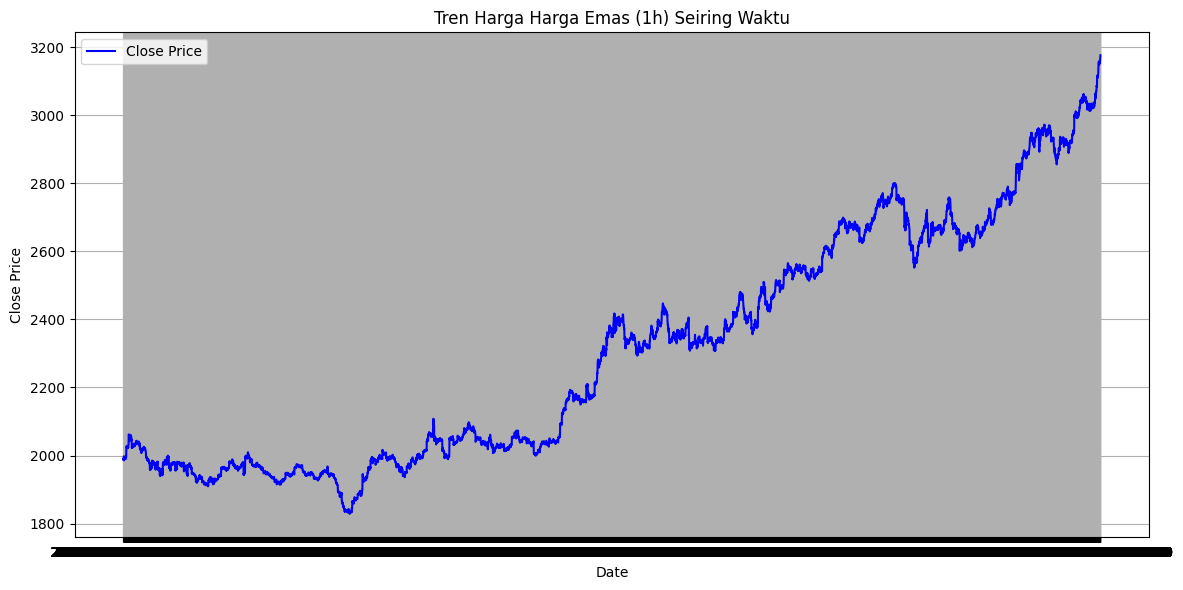

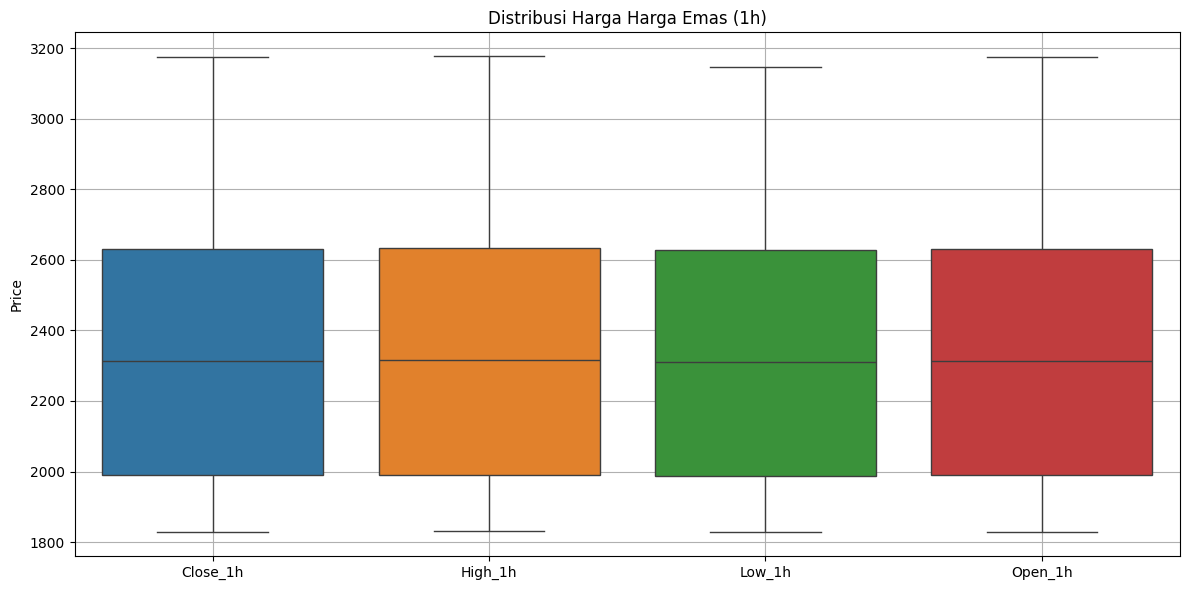

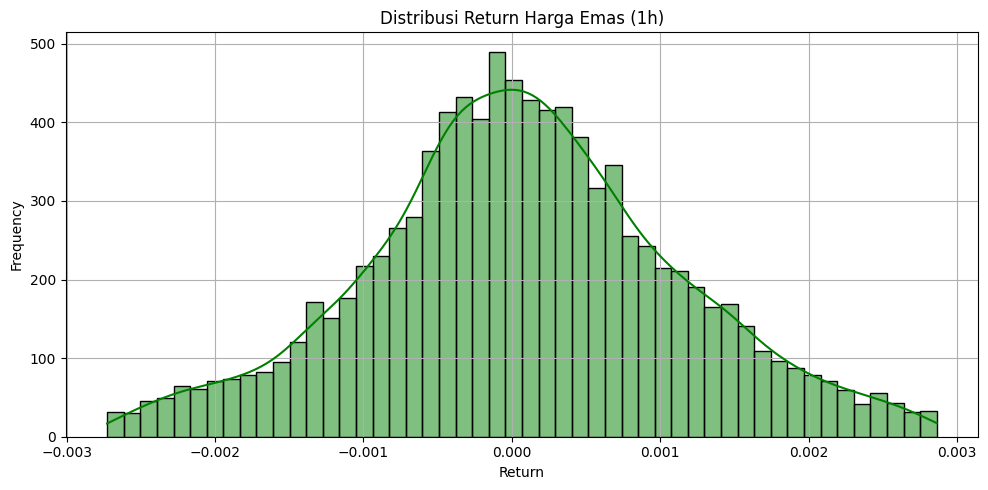

In [63]:
visualize_data(df_gold, title="Harga Emas", interval='1h')  # Untuk data per jam

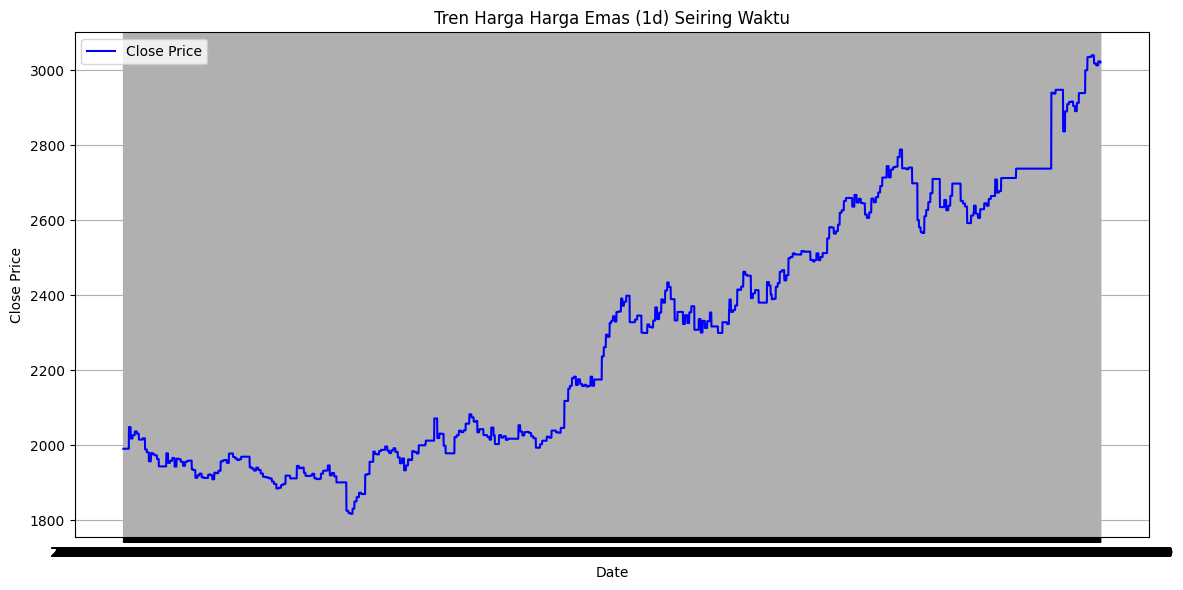

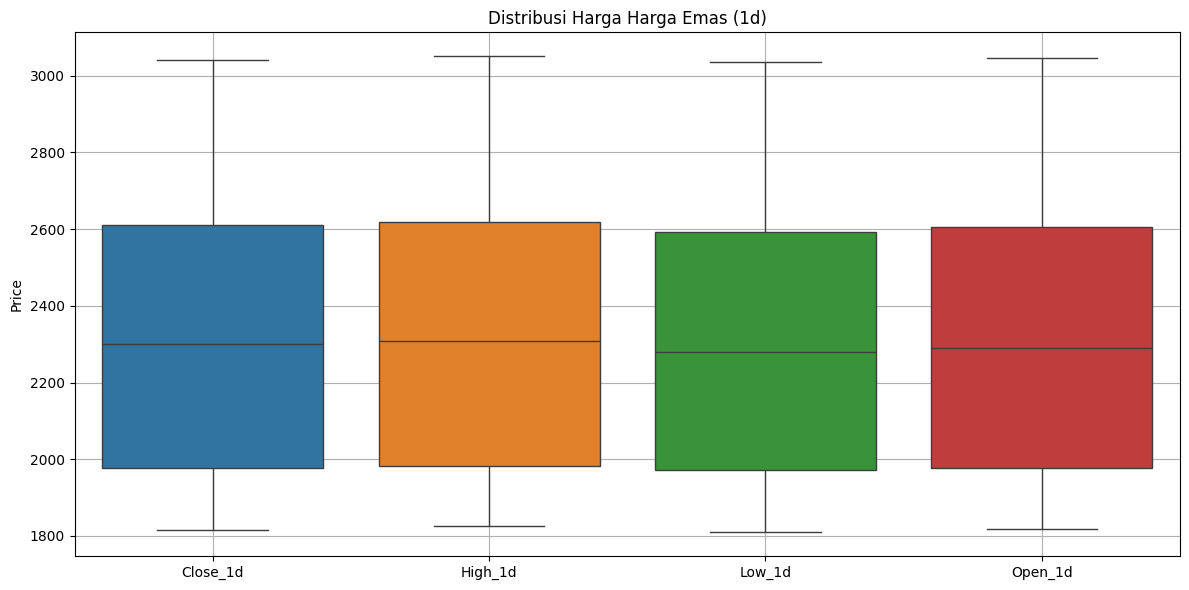

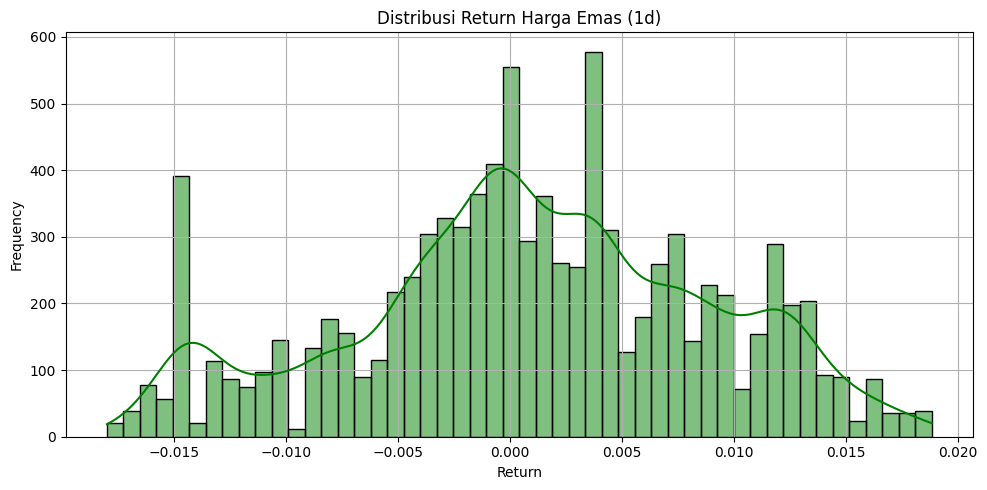

In [64]:
visualize_data(df_gold, title="Harga Emas", interval='1d')  # Untuk data harian

In [65]:
df_gold = pd.read_csv("../dataset/gold_data_cleaned.csv")

# Cek ringkasan dataset
print(df_gold.info())
print(df_gold.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9457 entries, 0 to 9456
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9457 non-null   object 
 1   Open_1h    9457 non-null   float64
 2   High_1h    9457 non-null   float64
 3   Low_1h     9457 non-null   float64
 4   Close_1h   9457 non-null   float64
 5   Volume_1h  9457 non-null   int64  
 6   Return_1h  9457 non-null   float64
 7   Ticker_1h  9457 non-null   object 
 8   Open_1d    9365 non-null   float64
 9   High_1d    9365 non-null   float64
 10  Low_1d     9365 non-null   float64
 11  Close_1d   9365 non-null   float64
 12  Volume_1d  9365 non-null   float64
 13  Return_1d  9365 non-null   float64
 14  Ticker_1d  9365 non-null   object 
dtypes: float64(11), int64(1), object(3)
memory usage: 1.1+ MB
None
           Open_1h      High_1h       Low_1h     Close_1h     Volume_1h  \
count  9457.000000  9457.000000  9457.000000  9457.000000   9457.00000